In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
tweets_df = pd.read_csv(r"twitter_disaster.csv")  # Replace "dataset.csv" with your dataset file path

In [3]:
# Explore the dataset's structure
print("Dataset structure:")
print(tweets_df.info())

Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None


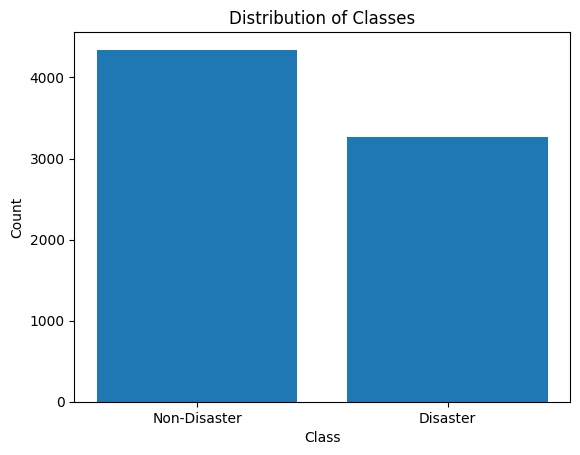

In [4]:
# Visualize the distribution of classes (disaster vs. non-disaster tweets)
# Remove rows with invalid tweets (tweets containing URL with '$')
tweets_df = tweets_df[~tweets_df['text'].str.contains(r'http\S*\$')]

# Visualize distribution of classes
class_distribution = tweets_df['target'].value_counts()
plt.bar(class_distribution.index, class_distribution.values)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Disaster', 'Disaster'])
plt.show()

In [5]:
# Analyze frequency of keywords and phrases associated with disaster tweets
disaster_tweets = tweets_df[tweets_df['target'] == 1]['text'].tolist()
disaster_text = ' '.join(disaster_tweets)
disaster_text

"Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all Forest fire near La Ronge Sask. Canada All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected 13,000 people receive #wildfires evacuation orders in California  Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school  #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires #flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas I'm on top of the hill and I can see a fire in the woods... There's an emergency evacuation happening now in the building across the street I'm afraid that the tornado is coming to our area... Three people died from the heat wave so far Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding #raining #flooding #Florida

### Analyze the frequency of keywords and phrases associated with disaster tweets.

In [6]:
from nltk.tokenize import word_tokenize
# Tokenize the text
tokens = word_tokenize(disaster_text)

In [7]:
# Remove punctuation and lowercase tokens
words = [word.lower() for word in tokens if word.isalpha()]

In [8]:
from collections import Counter
# Assuming `words` is a list containing words
# Count word frequencies
word_freq = Counter(words)

In [9]:
# Print most common words
print("\nMost common words in disaster tweets:")
for word, freq in word_freq.most_common(20):
    print(f"{word}: {freq}")


Most common words in disaster tweets:
http: 2380
the: 1345
in: 1159
a: 925
of: 921
to: 757
and: 502
on: 417
for: 400
is: 363
i: 360
at: 305
by: 275
from: 245
it: 225
that: 208
with: 192
this: 182
after: 181
fire: 177


###  Data Preparation

### Clean the text data by removing special characters, URLs, and punctuation mark

In [10]:
import nltk
import re
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
#creating list of possible stopwords from nltk library
stop = stopwords.words('english')

from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
#creating list of possible stopwords from nltk library
stop = stopwords.words('english')

# Clean the text data
def clean_tweet(text):
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters and punctuation marks
    text = re.sub(r'[0-9]', '', text)
    return text.strip()

tweets_df['clean_tweets'] = tweets_df['text'].apply(clean_tweet)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
tweets_df.head(5)

,id,keyword,location,text,target,clean_tweets
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in ...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...


In [12]:
# craeteing new column for storing length of reviews 
tweets_df['tweets_length'] = tweets_df['text'].apply(len)
tweets_df.head()

,id,keyword,location,text,target,clean_tweets,tweets_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in ...,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,88


### Tokenize the text into individual words or tokens

In [13]:
# Tokenize the text
from nltk.tokenize import word_tokenize
tweets_df['tokens'] = tweets_df['clean_tweets'].apply(word_tokenize)

In [14]:
tweets_df.head(3)

,id,keyword,location,text,target,clean_tweets,tweets_length,tokens
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,69,"[Our, Deeds, are, the, Reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,38,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,133,"[All, residents, asked, to, shelter, in, place..."


In [15]:
#convert all letters to lowercase
tweets_df['clean_tweets'] = tweets_df['clean_tweets'].apply(lambda x: x.lower())

tweets_df.head(3)

,id,keyword,location,text,target,clean_tweets,tweets_length,tokens
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,69,"[Our, Deeds, are, the, Reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,38,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,133,"[All, residents, asked, to, shelter, in, place..."


In [16]:
import nltk
try:
    nltk.data.find('corpora/stopwords.zip/stopwords')
except LookupError:
    nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
#remove stopwords
tweets_df['clean_tweets'] = tweets_df['clean_tweets'].apply(lambda x: [word for word in x.split() if word not in stopwords.words('english')])
tweets_df.head(3)

,id,keyword,location,text,target,clean_tweets,tweets_length,tokens
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[deeds, reason, earthquake, may, allah, forgiv...",69,"[Our, Deeds, are, the, Reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, ronge, sask, canada]",38,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[residents, asked, shelter, place, notified, o...",133,"[All, residents, asked, to, shelter, in, place..."


In [18]:
#lemmatise text
tweets_df['clean_tweets'] = tweets_df['clean_tweets'].apply(lambda x: [WordNetLemmatizer().lemmatize(word) for word in x])
tweets_df.head(3)

,id,keyword,location,text,target,clean_tweets,tweets_length,tokens
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[deed, reason, earthquake, may, allah, forgive...",69,"[Our, Deeds, are, the, Reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, ronge, sask, canada]",38,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[resident, asked, shelter, place, notified, of...",133,"[All, residents, asked, to, shelter, in, place..."


In [19]:
#combine words in each row into a single string
tweets_df['clean_tweets'] = tweets_df['clean_tweets'].apply(lambda x: ' '.join(word for word in x))
tweets_df.head(3)

,id,keyword,location,text,target,clean_tweets,tweets_length,tokens
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u,69,"[Our, Deeds, are, the, Reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,38,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...,133,"[All, residents, asked, to, shelter, in, place..."


### Convert text labels into numerical format (e.g., 0 for non-disaster, 1 for disaster)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer()


count_vectorizer = CountVectorizer()

X_count = count_vectorizer.fit_transform(tweets_df['text'])

feature_names_count = count_vectorizer.get_feature_names_out() 
print("Type of x_count:", type(X_count))

print("Shape of X count:', x count.shape")
print("Vocabulary (CountVectorizer):\n", feature_names_count)

tfidf_vectorizer = TfidfVectorizer()

X_tfidf = tfidf_vectorizer.fit_transform(tweets_df['text'])

feature_names_tfidf = tfidf_vectorizer.get_feature_names_out() 
print('Type of X_tfidf:',type(X_tfidf))

print('Shape of X tfidf:', X_tfidf.shape)

print('Vocabulary(tfidf-Vectorizer):\n', feature_names_tfidf)

print("Transformed Feature Matrix(Countvectorizer):\n", X_count[:10].toarray())
print("Transformed Feature Matrix(TF-IDF Vectorizer):\n", X_tfidf[:10].toarray())

Type of x_count: <class 'scipy.sparse._csr.csr_matrix'>
Shape of X count:', x count.shape
Vocabulary (CountVectorizer):
 ['00' '000' '0000' ... 'ûónegligence' 'ûótech' 'ûówe']
Type of X_tfidf: <class 'scipy.sparse._csr.csr_matrix'>
Shape of X tfidf: (7613, 21637)
Vocabulary(tfidf-Vectorizer):
 ['00' '000' '0000' ... 'ûónegligence' 'ûótech' 'ûówe']
Transformed Feature Matrix(Countvectorizer):
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Transformed Feature Matrix(TF-IDF Vectorizer):
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Visualising words inside Real Disaster Tweets

In [21]:
#Removing stop words which are unneccesary from headline news
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

tweets_df_1 = tweets_df[tweets_df['target']==1]
tweets_df_0= tweets_df[tweets_df['target'] == 0]
tweets_df_1['clean_tweets']=tweets_df_1['clean_tweets'].apply(remove_stopwords)
tweets_df_0['clean_tweets']=tweets_df_0['clean_tweets'].apply(remove_stopwords)

C:\Users\Dell\AppData\Local\Temp\ipykernel_10352\3459429980.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df_1['clean_tweets']=tweets_df_1['clean_tweets'].apply(remove_stopwords)
C:\Users\Dell\AppData\Local\Temp\ipykernel_10352\3459429980.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df_0['clean_tweets']=tweets_df_0['clean_tweets'].apply(remove_stopwords)


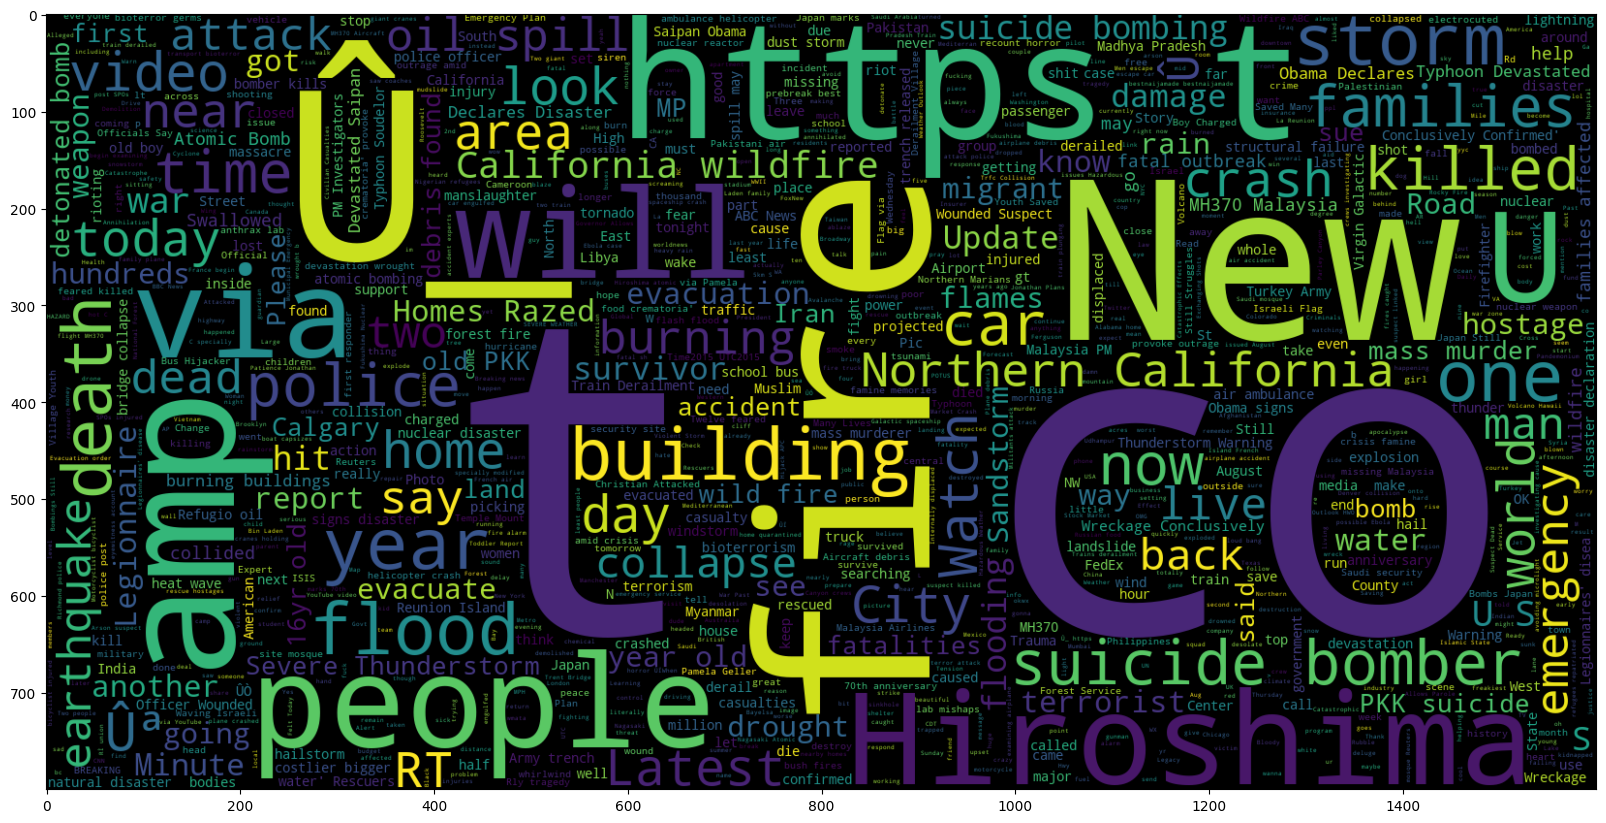

In [22]:
from wordcloud import WordCloud
plt.figure(figsize = (20,15)) # Text that is Disaster tweets
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(tweets_df_1.text))
plt.imshow(wc , interpolation = 'bilinear')

Note: we can see that most common words in disaster tweets are fire,storm,flood , police etc.

###  Visualising words inside Fake Disaster Tweets

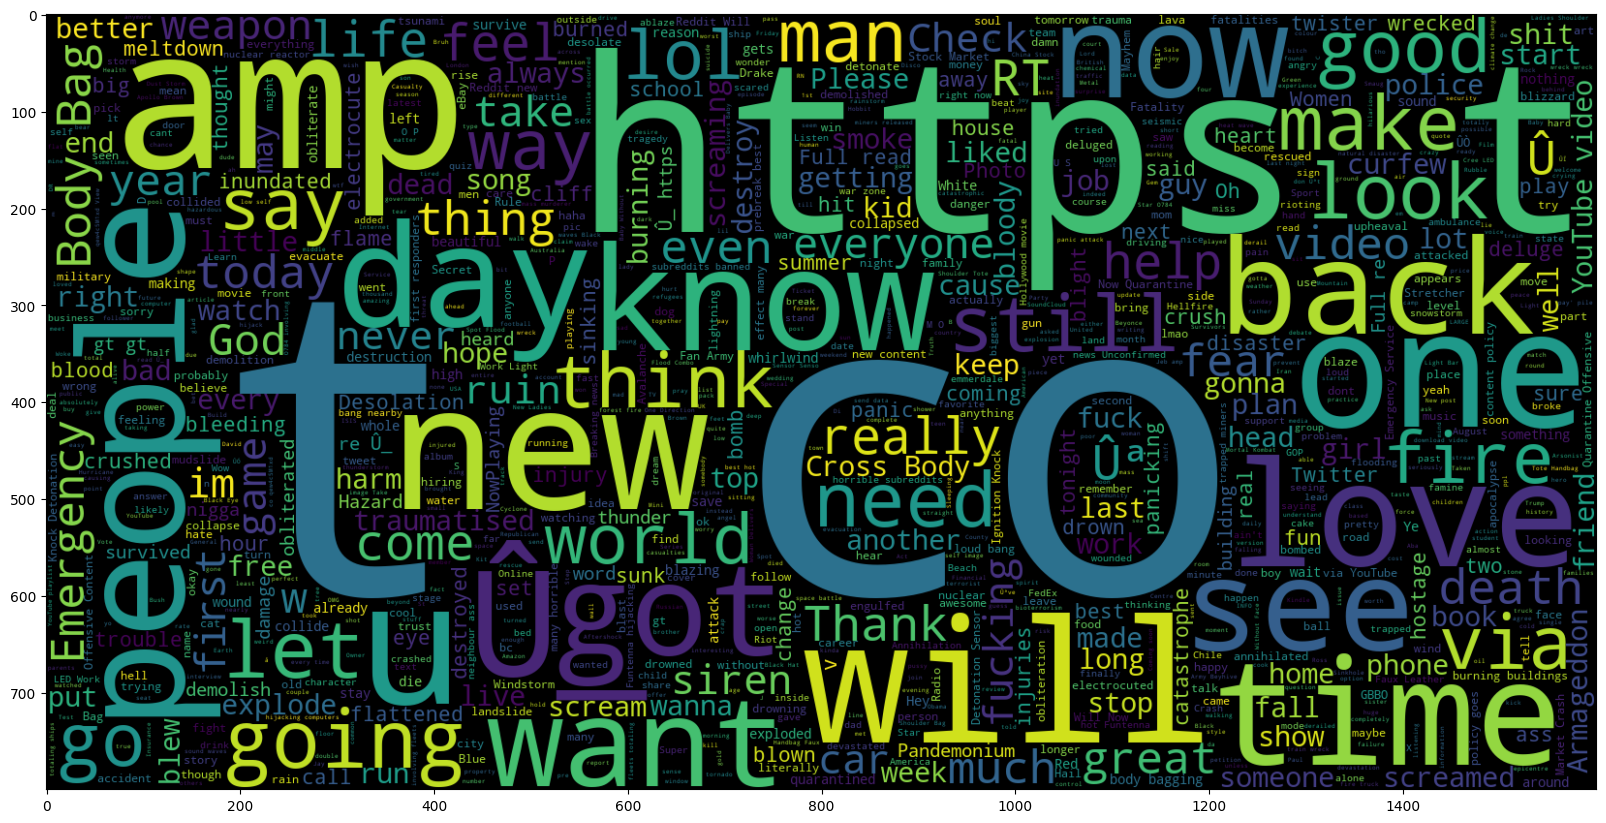

In [23]:
plt.figure(figsize = (20,20)) # Text that is Normal Tweets
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(tweets_df_0.text))
plt.imshow(wc , interpolation = 'bilinear')

Note : love,new,time etc are the most common words as we can see in wordcloud of Non-disaster tweets

Our cleaned text still contains some unnecessary words (such as: like, amp, get, would etc.) that aren't relevant and can confuse our model,
resulting in false prediction. Now, we will further remove some words with high frequency from text based on above charts.

In [24]:
from sklearn.preprocessing import LabelEncoder

# Assuming tweets_df is your DataFrame containing the text data and 'target' is the column indicating the class
#label_encoder = LabelEncoder()
#tweets_df['numerical_target'] = label_encoder.fit_transform(tweets_df['target'])

In [25]:
tweets_df.head(3)

,id,keyword,location,text,target,clean_tweets,tweets_length,tokens
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u,69,"[Our, Deeds, are, the, Reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,38,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...,133,"[All, residents, asked, to, shelter, in, place..."


### Split the dataset into training and testing sets for model development and evaluation.

In [26]:
y = tweets_df.target
x= tweets_df.clean_tweets

In [27]:
x.head(3)

0           deed reason earthquake may allah forgive u
1                forest fire near la ronge sask canada
2    resident asked shelter place notified officer ...
Name: clean_tweets, dtype: object

In [28]:
y.head(3)

0    1
1    1
2    1
Name: target, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets to verify the split
print("Training set - Features shape:", X_train.shape)
print("Training set - Labels shape:", y_train.shape)
print("Testing set - Features shape:", X_test.shape)
print("Testing set - Labels shape:", y_test.shape)


Training set - Features shape: (6090,)
Training set - Labels shape: (6090,)
Testing set - Features shape: (1523,)
Testing set - Labels shape: (1523,)


### Feature Engineering and Model Selection

Extract relevant features from the text data, such as word frequencies, TF-IDF
scores, and sentiment analysis.

In [30]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Extract word frequencies
count_vectorizer = CountVectorizer()
word_frequencies = count_vectorizer.fit_transform(tweets_df['text'])

#Extract TF-IDF scores
tfidf_vectorizer = TfidfVectorizer()
tfidf_scores = tfidf_vectorizer.fit_transform(tweets_df['text'])

#Perform sentiment analysis
sid = SentimentIntensityAnalyzer()
sentiment_scores = tweets_df['text'].apply(lambda x: sid.polarity_scores(x))

#Combine features into a DataFrame
features_df = pd.DataFrame({
    'word_frequencies': word_frequencies.sum(axis=1).tolist(),  # Summing up frequencies of all words in each document
    'tfidf_scores': tfidf_scores.sum(axis=1).tolist(),  # Summing up TF-IDF scores of all words in each document
    'sentiment_scores': sentiment_scores.tolist()
})

#Concatenate features DataFrame with original DataFrame
tweets_df = pd.concat([tweets_df, features_df], axis=1)



In [31]:
tweets_df.head(5)

,id,keyword,location,text,target,clean_tweets,tweets_length,tokens,word_frequencies,tfidf_scores,sentiment_scores
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u,69,"[Our, Deeds, are, the, Reason, of, this, earth...",[13],[3.3724660744611072],"{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'comp..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,38,"[Forest, fire, near, La, Ronge, Sask, Canada]",[7],[2.57416281961146],"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp..."
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...,133,"[All, residents, asked, to, shelter, in, place...",[22],[3.8486296097268884],"{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'comp..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,65,"[people, receive, wildfires, evacuation, order...",[9],[2.8743558689536983],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...,88,"[Just, got, sent, this, photo, from, Ruby, Ala...",[15],[3.6077923407272414],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

# Extract TF-IDF scores
tfidf_vectorizer = TfidfVectorizer()
tfidf_scores = tfidf_vectorizer.fit_transform(x)


# Function to extract word frequencies
def extract_word_frequencies(text):
    tokens = word_tokenize(text)
    word_freq = {}
    for word in tokens:
        word_freq[word] = word_freq.get(word, 0) + 1
    return word_freq

# Function to calculate TF-IDF scores
def calculate_tfidf(corpus):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
    return tfidf_matrix

# Function to perform sentiment analysis
def perform_sentiment_analysis(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)
    return sentiment_scores['compound']  # Using compound score as the sentiment feature

# Additional feature extraction function
def extract_additional_features(text):
    tweet_length = len(text)
    has_hashtag = 1 if '#' in text else 0
    has_user_mention = 1 if '@' in text else 0
    return tweet_length, has_hashtag, has_user_mention

# Apply feature engineering
tweets_df['word_frequencies'] = tweets_df['text'].apply(extract_word_frequencies)
tfidf_scores = calculate_tfidf(tweets_df['text'])
tweets_df['sentiment_score'] = tweets_df['text'].apply(perform_sentiment_analysis)


In [33]:
tweets_df.head(5)

,id,keyword,location,text,target,clean_tweets,tweets_length,tokens,word_frequencies,tfidf_scores,sentiment_scores,sentiment_score
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u,69,"[Our, Deeds, are, the, Reason, of, this, earth...","{'Our': 1, 'Deeds': 1, 'are': 1, 'the': 1, 'Re...",[3.3724660744611072],"{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'comp...",0.2732
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,38,"[Forest, fire, near, La, Ronge, Sask, Canada]","{'Forest': 1, 'fire': 1, 'near': 1, 'La': 1, '...",[2.57416281961146],"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",-0.3400
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...,133,"[All, residents, asked, to, shelter, in, place...","{'All': 1, 'residents': 1, 'asked': 1, 'to': 1...",[3.8486296097268884],"{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'comp...",-0.2960
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,65,"[people, receive, wildfires, evacuation, order...","{'13,000': 1, 'people': 1, 'receive': 1, '#': ...",[2.8743558689536983],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...,88,"[Just, got, sent, this, photo, from, Ruby, Ala...","{'Just': 1, 'got': 1, 'sent': 1, 'this': 1, 'p...",[3.6077923407272414],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


### Consider using pre-trained word embeddings like Word2Vec or GloVe to capture semantic meanings.


In [34]:
#from gensim.models import Word2Vec
#import gensim
#from nltk.tokenize import sent_tokenize, word_tokenize
#import gensim.downloader as api
#import warnings
 
#warnings.filterwarnings(action='ignore')
 

# Load Word2Vec model
#word2vec_model = api.load("word2vec-google-news-300")

# Clean tweets (remove punctuation, lowercase, etc.)
#tweets_df['clean_tweets'] = tweets_df['text'].str.lower().str.replace(r'[^a-zA-Z\s]', '', regex=True)

# Tokenize the text data
#tweets_df['tokens'] = tweets_df['clean_tweets'].apply(word_tokenize)

# Function to get Word2Vec vectors for tokens
#def get_word2vec_vectors(tokens):
#    vectors = []
#    for token in tokens:
#        if token in word2vec_model.vocab:
#           vectors.append(word2vec_model[token])
#    return vectors

# Apply Word2Vec vectors to tokens
#tweets_df['word2vec_vectors'] = tweets_df['tokens'].apply(get_word2vec_vectors)

# Display the DataFrame with Word2Vec vectors
#print(tweets_df[['text', 'clean_tweets', 'tokens', 'word2vec_vectors']])


### Experiment with additional features like tweet length, presence of hashtags, or user mentions

In [35]:
# Create DataFrame
df = pd.DataFrame(tweets_df)

# Check for presence of hashtags and user mentions
df['has_hashtag'] = df['clean_tweets'].apply(lambda x: 1 if '#' in x else 0)
df['has_user_mention'] = df['clean_tweets'].apply(lambda x: 1 if '@' in x else 0)

# Tokenize the text data
df['tokens'] = df['clean_tweets'].apply(word_tokenize)

# Display the DataFrame with additional features
df[['text', 'clean_tweets', 'has_hashtag', 'has_user_mention']]

,text,clean_tweets,has_hashtag,has_user_mention
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquake may allah forgive u,0,0
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada,0,0
2,All residents asked to 'shelter in place' are ...,resident asked shelter place notified officer ...,0,0
3,"13,000 people receive #wildfires evacuation or...",people receive wildfire evacuation order calif...,0,0
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby alaska smoke wildfire pour...,0,0
...,...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,two giant crane holding bridge collapse nearby...,0,0
7609,@aria_ahrary @TheTawniest The out of control w...,aria_ahrary thetawniest control wild fire cali...,0,0
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,utckm volcano hawaii,0,0
7611,Police investigating after an e-bike collided ...,police investigating ebike collided car little...,0,0


### Model Selection and Trainin

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_tweets'], df['target'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train_tfidf, y_train)
logreg_pred = logreg_model.predict(X_test_tfidf)
logreg_accurecy = accuracy_score(y_test,logreg_pred)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_pred))
print("Accurecy LogisticRegression:",logreg_accurecy)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       874
           1       0.82      0.68      0.74       649

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.80      1523

Accurecy LogisticRegression: 0.799080761654629


In [37]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


C_vals = [10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4]

for num in C_vals:
    clf = LogisticRegression(C=num, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5050,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

    clf.fit(X_train_tfidf, y_train)
    predicted = clf.predict(X_test_tfidf)
    logistic_f1 = f1_score(y_test, predicted)
    print(f"F1 score = {logistic_f1}")
    print("C value = {}".format(num))
    print("Train Accuracy = {}%".format(clf.score(X_train_tfidf, y_train)*100))
    print("Test Accuracy = {}%".format(clf.score(X_test_tfidf, y_test)*100))
    print(70*"=")

F1 score = 0.0
C value = 0.0001
Train Accuracy = 56.945812807881765%
Test Accuracy = 57.38673670387393%
F1 score = 0.0
C value = 0.001
Train Accuracy = 56.945812807881765%
Test Accuracy = 57.38673670387393%
F1 score = 0.0
C value = 0.01
Train Accuracy = 56.945812807881765%
Test Accuracy = 57.38673670387393%
F1 score = 0.5284280936454849
C value = 0.1
Train Accuracy = 73.26765188834155%
Test Accuracy = 72.22586999343402%
F1 score = 0.7424242424242424
C value = 1
Train Accuracy = 89.17898193760263%
Test Accuracy = 79.9080761654629%
F1 score = 0.7402078337330136
C value = 10
Train Accuracy = 97.816091954023%
Test Accuracy = 78.66053841103086%
F1 score = 0.711217183770883
C value = 100
Train Accuracy = 98.80131362889983%
Test Accuracy = 76.16546290216678%
F1 score = 0.7198105761641673
C value = 1000
Train Accuracy = 98.85057471264368%
Test Accuracy = 76.69074195666448%
F1 score = 0.7121799844840963
C value = 10000
Train Accuracy = 98.81773399014779%
Test Accuracy = 75.64018384766908%


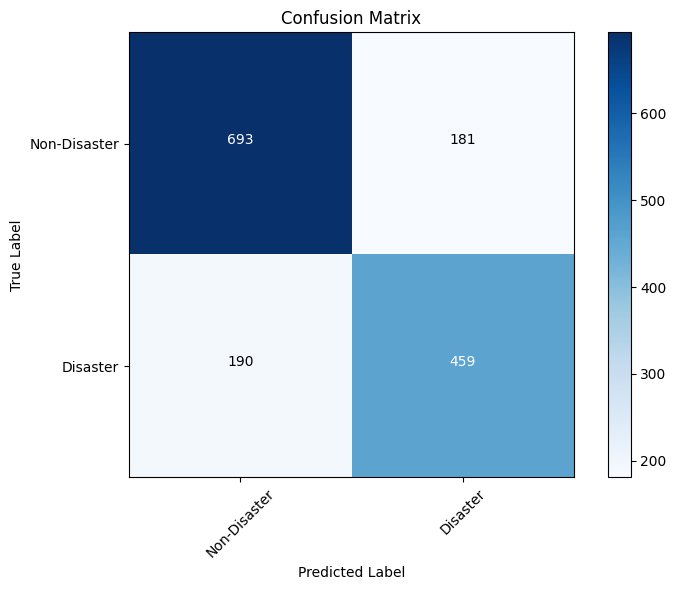

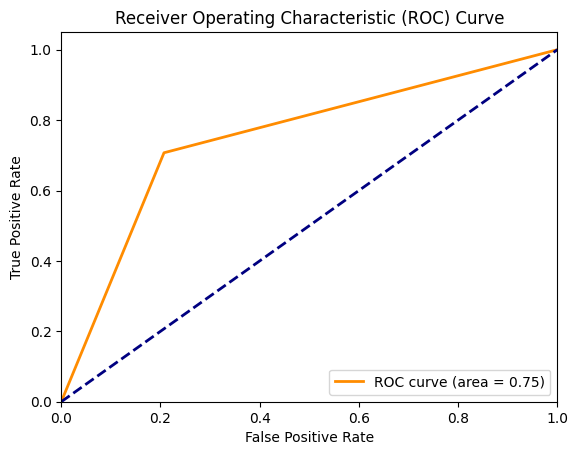

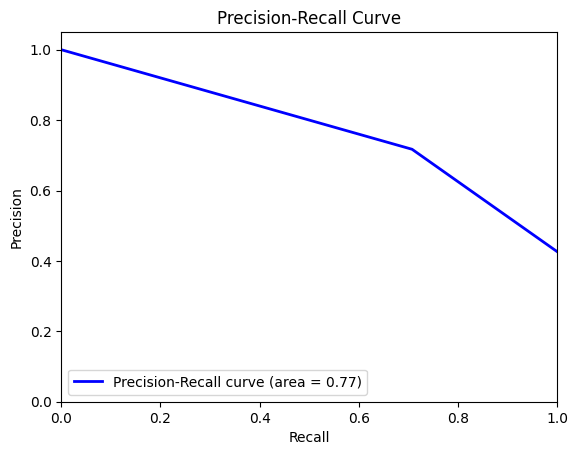

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    # Function to plot precision-recall curve
def plot_precision_recall_curve(y_true, y_score):
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    pr_auc = auc(recall, precision)
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

# Assuming nn_model is your trained neural network model
# Validate the selected model on the testing dataset
y_pred_probs = clf.predict(X_test_tfidf)
y_pred = (y_pred_probs > 0.5).astype(int)  # Apply threshold (0.5) to convert probabilities to binary predictions

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=['Non-Disaster', 'Disaster'])

# Plot ROC curve
plot_roc_curve(y_test, y_pred_probs)

# Plot precision-recall curve
plot_precision_recall_curve(y_test, y_pred_probs)
    
    

In [39]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)
rf_pred = rf_model.predict(X_test_tfidf)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.82       874
           1       0.79      0.68      0.73       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



#### Model RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming you have your data loaded into X_train_tfidf, X_test_tfidf, y_train, y_test

# Define a list of values for the 'n_estimators' parameter
n_estimators_values = [50, 100, 150]

# Loop over each value of 'n_estimators' and train a RandomForestClassifier
for n_estimators in n_estimators_values:
    random_forest_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42, n_jobs=-1)
    random_forest_model.fit(X_train_tfidf, y_train)
    
    # Evaluate the model
    accuracy = random_forest_model.score(X_test_tfidf, y_test)
    print("Accuracy with {} estimators: {:.2f}".format(n_estimators, accuracy))
    
    #Make prediction on the test data
    predict=random_forest_model.predict(X_test_tfidf)
    
    # Evaluate model performance 
    rf_accuracy = accuracy_score(y_test,predict)
    print("Accuracy:",rf_accuracy)
    
    report = classification_report(y_test,predict)
    print("classification_report:")
    print(report)


Accuracy with 50 estimators: 0.78
Accuracy: 0.7826657912015759
classification_report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       874
           1       0.78      0.68      0.73       649

    accuracy                           0.78      1523
   macro avg       0.78      0.77      0.77      1523
weighted avg       0.78      0.78      0.78      1523

Accuracy with 100 estimators: 0.78
Accuracy: 0.7813525935653316
classification_report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       874
           1       0.78      0.68      0.73       649

    accuracy                           0.78      1523
   macro avg       0.78      0.77      0.77      1523
weighted avg       0.78      0.78      0.78      1523

Accuracy with 150 estimators: 0.78
Accuracy: 0.7813525935653316
classification_report:
              precision    recall  f1-score   support

           0       0.78      0.

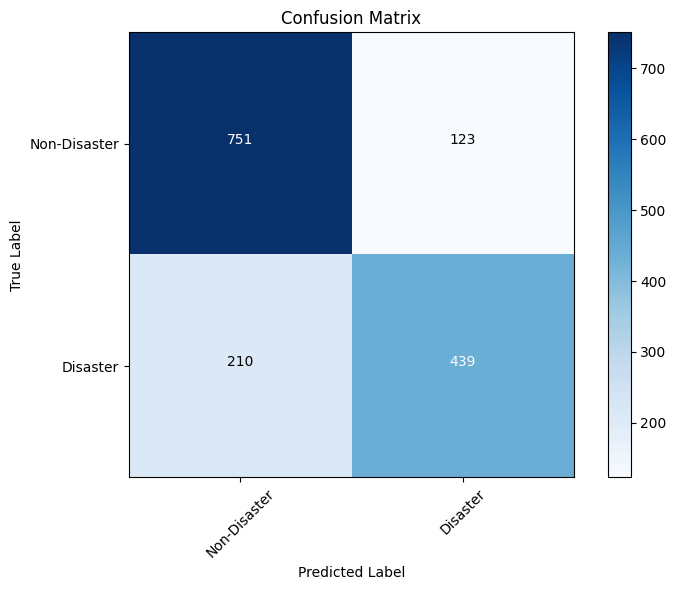

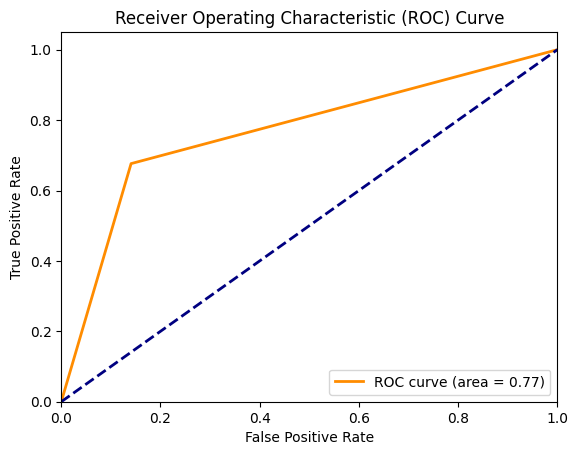

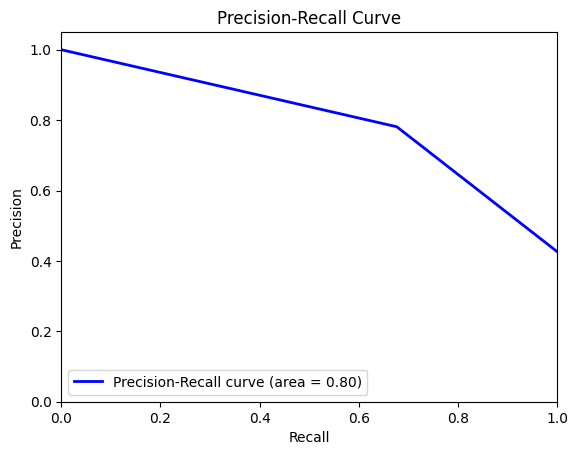

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    # Function to plot precision-recall curve
def plot_precision_recall_curve(y_true, y_score):
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    pr_auc = auc(recall, precision)
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

# Validate the selected model on the testing dataset
y_pred_probs = random_forest_model.predict(X_test_tfidf)
y_pred = (y_pred_probs > 0.5).astype(int)  # Apply threshold (0.5) to convert probabilities to binary predictions

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=['Non-Disaster', 'Disaster'])

# Plot ROC curve
plot_roc_curve(y_test, y_pred_probs)

# Plot precision-recall curve
plot_precision_recall_curve(y_test, y_pred_probs)
    
    

#### Model Support Vector Machine (SVM)

In [42]:
from sklearn.svm import SVC
#Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)
svm_predictions = svm_model.predict(X_test_tfidf)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)
f1 = f1_score(y_test, predicted)
print(f"F1 score = {f1}")
print("C value = {}".format(num))
print("Train Accuracy = {}%".format(svm_model.score(X_train_tfidf, y_train)*100))
print("Test Accuracy = {}%".format(svm_model.score(X_test_tfidf, y_test)*100))
print(70*"=")

SVM Accuracy: 0.793827971109652
F1 score = 0.7121799844840963
C value = 10000
Train Accuracy = 93.48111658456486%
Test Accuracy = 79.3827971109652%


#### Visualize the performance metrics using confusion matrices, ROC curves, and precision-recall curves(Model Support Vector Machine (SVM))

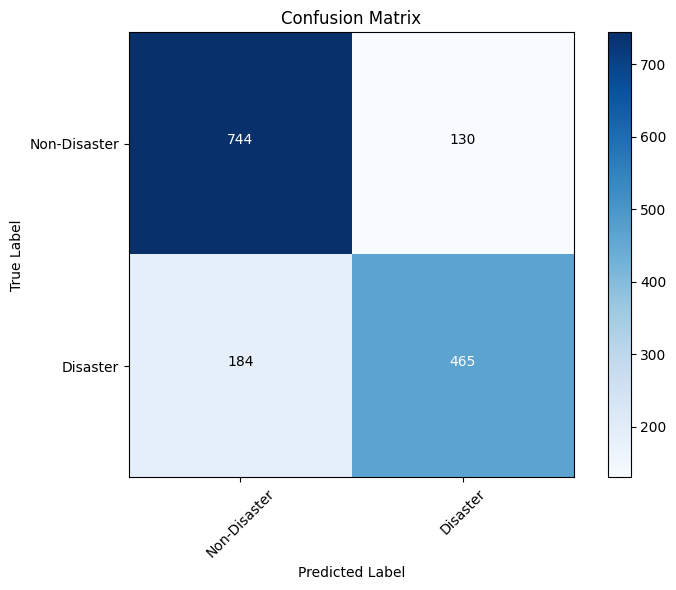

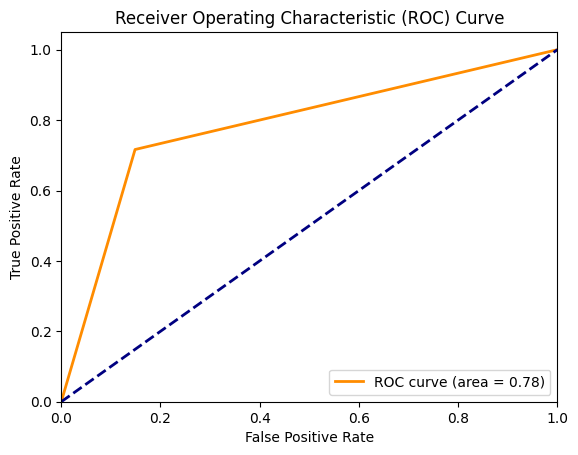

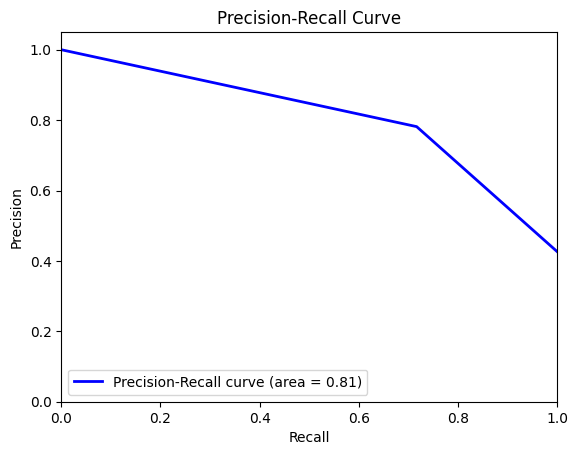

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, svm_predictions , classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, svm_predictions )
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')
    plt.show()
# Function to plot ROC curve
def plot_roc_curve(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    # Function to plot precision-recall curve
def plot_precision_recall_curve(y_true, y_score):
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    pr_auc = auc(recall, precision)
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

# Assuming you have selected and trained a model named 'selected_model' on the training dataset
# selected_model = ...

# Assuming nn_model is your trained neural network model
# Validate the selected model on the testing dataset
y_pred_probs = svm_model.predict(X_test_tfidf)
y_pred = (y_pred_probs > 0.5).astype(int)  # Apply threshold (0.5) to convert probabilities to binary predictions

# Plot confusion matrix
plot_confusion_matrix(y_test, svm_predictions, classes=['Non-Disaster', 'Disaster'])

# Plot ROC curve
plot_roc_curve(y_test, y_pred_probs)

# Plot precision-recall curve
plot_precision_recall_curve(y_test, y_pred_probs)

NLP model MLPClassifier

In [44]:
# Model 3: Neural Network
from sklearn.neural_network import MLPClassifier
neural_network_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
neural_network_model.fit(X_train_tfidf, y_train)
neural_network_predictions = neural_network_model.predict(X_test_tfidf)
neural_network_accuracy = accuracy_score(y_test, neural_network_predictions)
print("Neural Network Accuracy:", neural_network_accuracy)

Neural Network Accuracy: 0.7432698621142482


In [45]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier


# Vectorizing the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Neural Network with Keras
nn_model = MLPClassifier()
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Assuming you have your data loaded into X_train_tfidf, X_test_tfidf, y_train, y_test

# Create an MLPClassifier object
nn_model = MLPClassifier()

# Fit the model to the training data
nn_model.fit(X_train_tfidf, y_train)

# Predict on the test data
nn_pred = nn_model.predict(X_test_tfidf)

# Evaluate the model
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_pred))


Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       874
           1       0.73      0.69      0.71       649

    accuracy                           0.76      1523
   macro avg       0.76      0.75      0.76      1523
weighted avg       0.76      0.76      0.76      1523



c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Visualize the performance metrics using confusion matrices, ROC curves, and precision-recall curves (Neural Network Classification)

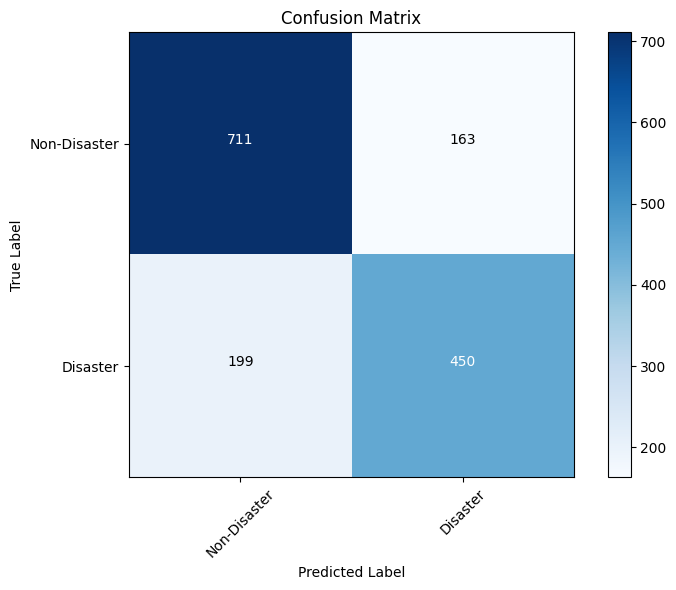

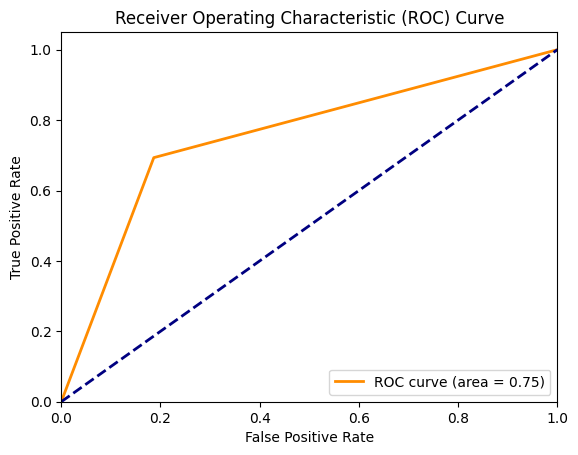

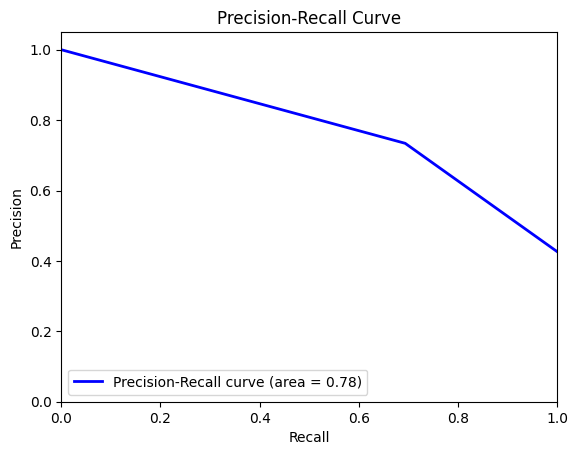

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')
    plt.show()
# Function to plot ROC curve
def plot_roc_curve(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Function to plot precision-recall curve
def plot_precision_recall_curve(y_true, y_score):
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    pr_auc = auc(recall, precision)
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

# Assuming you have selected and trained a model named 'selected_model' on the training dataset
# selected_model = ...

# Assuming nn_model is your trained neural network model
# Validate the selected model on the testing dataset
y_pred_probs = nn_model.predict(X_test_tfidf)
y_pred = (y_pred_probs > 0.5).astype(int)  # Apply threshold (0.5) to convert probabilities to binary predictions

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=['Non-Disaster', 'Disaster'])

# Plot ROC curve
plot_roc_curve(y_test, y_pred_probs)

# Plot precision-recall curve
plot_precision_recall_curve(y_test, y_pred_probs)


#### Train each model using the training data and evaluate their performance using cross-validation techniques

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Assuming you have your training data loaded into X_train and y_train

# Define the models
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    SVC(),
    MLPClassifier()
]

# Perform cross-validation for each model
for model in models:
    cv_scores = cross_val_score(model, X_test_tfidf, y_test, cv=5)  # 5-fold cross-validation
    print("Model:", model.__class__.__name__)
    print("Cross-Validation Scores:", cv_scores)
    print("Mean Accuracy:", cv_scores.mean())
    print()


Model: LogisticRegression
Cross-Validation Scores: [0.71803279 0.74098361 0.73770492 0.70065789 0.79276316]
Mean Accuracy: 0.7380284728213977

Model: RandomForestClassifier
Cross-Validation Scores: [0.69180328 0.71803279 0.72786885 0.72697368 0.75      ]
Mean Accuracy: 0.7229357204486627

Model: SVC
Cross-Validation Scores: [0.7147541  0.74754098 0.74754098 0.70394737 0.76644737]
Mean Accuracy: 0.7360461604831752



c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

Model: MLPClassifier
Cross-Validation Scores: [0.67540984 0.70491803 0.68852459 0.69407895 0.68421053]
Mean Accuracy: 0.6894283865401208



c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Optimize hyperparameters of the selected models using techniques like grid search or random search.


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Assuming you have your training data loaded into X_train and y_train

# Define the parameter grid for Random Forest Classifier
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier object
rf_classifier = RandomForestClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_test_tfidf, y_test)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best Score: 0.7347519413287317


In [49]:
# Serialize the trained model to a pickle file
# # Train a RandomForestClassifier
import pickle
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_tfidf, y_train)

# Serialize the trained model to a pickle file
random_forest_model = pickle.dump(random_forest_model,open('random_forest_model.pkl','wb'))


In [50]:
# Serialize the trained model to a pickle file
# # Train a logistic_regression_model
import pickle
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_tfidf, y_train)

# Serialize the trained model to a pickle file
logistic_regression_model = pickle.dump(logistic_regression_model,open('logistic_regression_model.pkl','wb'))
